In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('Google_Stock_Price_Train.csv')
df_test = pd.read_csv('Google_Stock_Price_Test.csv')

In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [ ]:
df.shape

(1258, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


In [ ]:
X = df[['Open']]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled=scaler.transform(X)

In [ ]:
X_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [ ]:
X_scaled.shape

(1258, 1)

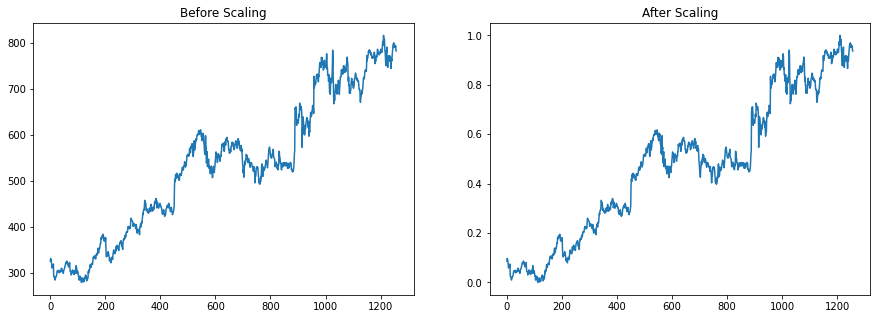

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.title("Before Scaling")
plt.plot(X)

plt.subplot(1, 2, 2)
plt.title("After Scaling")
plt.plot(X_scaled)
plt.show()

In [ ]:
X_train = []
y_train = []
window_size = 50
for i in range(window_size, X_scaled.shape[0]):
    X_train.append(X_scaled[i-window_size:i,0])
    y_train.append(X_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)
print(X_train.shape,y_train.shape)

(1208, 50) (1208,)


In [ ]:
X_train = X_train.reshape(-1,50,1)
print(X_train.shape)

(1208, 50, 1)


#LSTM

In [ ]:
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.models import Sequential
model = Sequential()
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=40, batch_size=5)

Epoch 1/40
242/242 [==============================] - 6s 16ms/step - loss: 0.0343 - accuracy: 0.0011
Epoch 2/40
242/242 [==============================] - 4s 16ms/step - loss: 0.0039 - accuracy: 0.0016
Epoch 3/40
242/242 [==============================] - 4s 16ms/step - loss: 0.0032 - accuracy: 0.0014
Epoch 4/40
242/242 [==============================] - 4s 16ms/step - loss: 0.0028 - accuracy: 0.0014
Epoch 5/40
242/242 [==============================] - 4s 16ms/step - loss: 0.0025 - accuracy: 5.0565e-04
Epoch 6/40
242/242 [==============================] - 4s 17ms/step - loss: 0.0023 - accuracy: 0.0028
Epoch 7/40
242/242 [==============================] - 4s 16ms/step - loss: 0.0021 - accuracy: 7.1543e-04
Epoch 8/40
242/242 [==============================] - 4s 16ms/step - loss: 0.0018 - accuracy: 0.0021
Epoch 9/40
242/242 [==============================] - 4s 16ms/step - loss: 0.0017 - accuracy: 8.4716e-04
Epoch 10/40
242/242 [==============================] - 4s 16ms/step - loss: 0.0

In [ ]:
df_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [ ]:
df_test.shape

(20, 6)

In [ ]:
X_test = df_test[['Open']].values
X_test = scaler.transform(X_test)
X_test_final=np.vstack([X_scaled,X_test])
X_test=[]
for i in range(len(X_scaled)-50,len(X_test_final)-50):
    X_test.append(X_test_final[i:i+50,0])
X_test = np.array(X_test)
X_test=X_test.reshape(-1,50,1)
y_pre = model.predict(X_test)

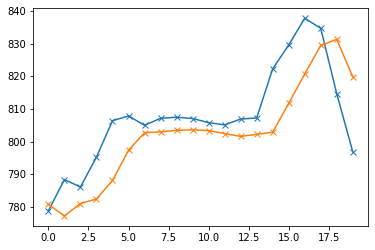

In [ ]:
plt.plot(df_test['Open'],marker='x')
plt.plot(scaler.inverse_transform(y_pre),marker='x')

#SimpleRNN

In [ ]:
#Import delle librerie
from keras.models import Sequential  
from keras.layers import Dense 
from keras.layers import SimpleRNN
from keras.layers import Dropout 

# Definizione del modello di RNN
model = Sequential()

#Definizione del primo layer con l'aggiunta della regolarizzazione mediante Dropout
model.add(SimpleRNN(units = 100,activation='relu', return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))

#Definizione del secondo layer con l'aggiunta della regolarizzazione mediante Dropout
model.add(SimpleRNN(units = 50))
model.add(Dropout(0.2))


# Definizione Output Layer
model.add(Dense(units = 1)) 

# Compilazione della RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fit di RNN
#batch_size: numero di esempi di training da prendere in considerazione
model.fit(X_train, y_train, epochs = 500, batch_size = 16)

Epoch 1/500
76/76 [==============================] - 3s 20ms/step - loss: 0.0818
Epoch 2/500
76/76 [==============================] - 2s 20ms/step - loss: 0.0159
Epoch 3/500
76/76 [==============================] - 2s 20ms/step - loss: 0.0107
Epoch 4/500
76/76 [==============================] - 2s 20ms/step - loss: 0.0077
Epoch 5/500
76/76 [==============================] - 2s 20ms/step - loss: 0.0065
Epoch 6/500
76/76 [==============================] - 2s 20ms/step - loss: 0.0055
Epoch 7/500
76/76 [==============================] - 2s 20ms/step - loss: 0.0048
Epoch 8/500
76/76 [==============================] - 2s 21ms/step - loss: 0.0046
Epoch 9/500
76/76 [==============================] - 2s 20ms/step - loss: 0.0035
Epoch 10/500
76/76 [==============================] - 2s 20ms/step - loss: 0.0041
Epoch 11/500
76/76 [==============================] - 2s 21ms/step - loss: 0.0033
Epoch 12/500
76/76 [==============================] - 2s 20ms/step - loss: 0.0034
Epoch 13/500
76/76 [=====

In [ ]:
predicted_data_modified = model.predict(X_test)
predicted_data_modified = scaler.inverse_transform(predicted_data_modified)

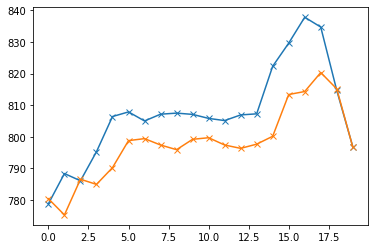

In [ ]:
plt.plot(df_test['Open'],marker='x')
plt.plot(predicted_data_modified,marker='x')